In [36]:
!pwd

/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks


This is second notebook that I intend to carry stuff related to plotting using matplotlib. The first notebook is http://localhost:8888/notebooks/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks/Python%20Plotting%20-%20matplotlib%2C%20(numpy%20too)%20etc.ipynb#PassingPlotsToFunctionsEtc

#### My words on 'figure' and the initially confusing concept of 'axes' in matplotlib.

My understanding so far (5/22/21) is that the **figure** object in matplotlib is like the TCanvas object in ROOT. And, 'axes' are like TPads (pads) in ROOT. A TCanvas or 'figure' is like a Frame that can have multiple photos or paintings in our real life situation. A (T)pad or an Axes (not 'axis') is like a real-life canvas or piece of paper on which we can have a painting done or a photo/graphics printed. The confusing 'Axes' could be thought of as a 2D region/space in the TCanvas or figure which is defined by (an x-axis and an y-axis). Now it makes sense when we say we want to add an "axes" to the figure, because that means we would add a drawing/painting space with an x-axis and an y-axis so we could draw a graphics object such as a photo, histogram, graph etc. Although, literally, 'axes' is a plural noun, we treat such a space defined by two axes as a singular noun 'axes' (which is the region why it is so confusing for beginners like me).

I later found that there is a similar opinion expressed in the following section entitled [The Matplotlib Object Hierarchy](#The_Matplotlib_Object_Hierarchy).

<a id='GoTop'></a>
## Contents
* [A note on the Object-Oriented API vs. Pyplot](#A_Note_On_Object-Oriented_API_vs_Pyplot)
* [Pylab: What Is It, and Should I Use It](#Pylab_What_Is_It_and_Should_I_Use_It)
* [The Matplotlib Object Hierarchy](#The_Matplotlib_Object_Hierarchy)
* [The “Figures” Behind The Scenes](#The_Figures_Behind_The_Scenes)
* [Plot_Organization_in_matplotlib](#Plot_Organization_in_matplotlib)
* [Creating custom plotting functions with matplotlib](#Creating_custom_plotting_functions_with_matplotlib)
* [Clearing the confusion on fig, ax = plt.subplots() and twinx, twiny, etc](#ClearingConfusion_twinx_twiny_etc)
* [About '%matplotlib inline'](#About_matplotlib_inline)

[GoTop](#GoTop) <a id='A_Note_On_Object-Oriented_API_vs_Pyplot'></a>
### A note on the Object-Oriented API vs. Pyplot

Ref: https://matplotlib.org/stable/tutorials/introductory/lifecycle.html 

Matplotlib has two interfaces. The first is an object-oriented (OO) interface. In this case, we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure.

The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

Most of the terms are straightforward but the main thing to remember is that:

* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot.

Note

In general, try to use the object-oriented interface over the pyplot interface.


### Linear Quadratic Model (LQM) for Survival Fractions (SFs)

In LQM, the survival fraction (SF) as a function of dose D (usually in units of Gray or Gy) is given by:

$SF(D) = exp(-\alpha D - \beta D^2)$

Actually, SF is what is measured, but here, just for a quick view of how it looks like, I am making a curve of SF using the first set of ($\alpha$,$\beta$) values ($\alpha = 0.024 Gy^{-1}, \beta = 0.033 Gy^{-1}$) in Britten et al 2013 paper (as mentioned in Paganetti 2014 paper).

The plot of SF vs D is also known as **dose response curve**.

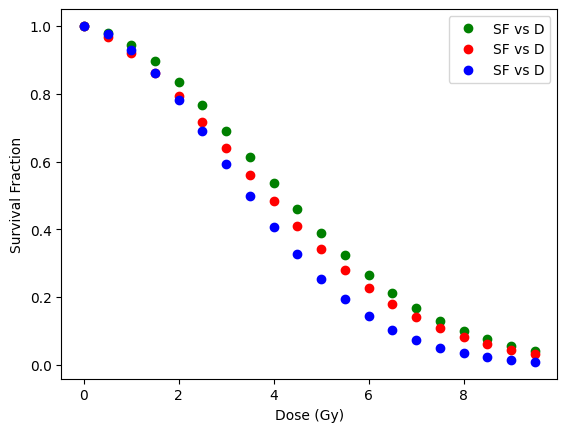

In [100]:
import numpy as np 

# First, let's prepare the arrays for the D and SF
#McNamara paper shows plots that has D going as far as 10 Gy
alpha1, beta1 = 0.024, 0.033
lDose = [0.1*x for x in range(0,100,5)]
#print(lDose)
lSF1 = [np.exp(-alpha1*D - beta1*D*D) for D in lDose]
#print(lSF)
alpha2, beta2 = 0.050, 0.033
alpha3, beta3 = 0.024, 0.050
lSF2 = [np.exp(-alpha2*D - beta2*D*D) for D in lDose]
lSF3 = [np.exp(-alpha3*D - beta3*D*D) for D in lDose]

# Now let's make the plot
import matplotlib.pyplot as plt
#plt.plot([1, 2, 3], color='red', label='line one')
#plt.plot([4, 6, 8], color='blue', label='line two')
plt.plot(lDose, lSF1,"go", label='SF vs D')
plt.plot(lDose, lSF2,"ro", label='SF vs D')
plt.plot(lDose, lSF3,"bo", label='SF vs D')
plt.xlabel('Dose (Gy)')
plt.ylabel('Survival Fraction')
#plt.yscale("log")
plt.legend()
plt.show()

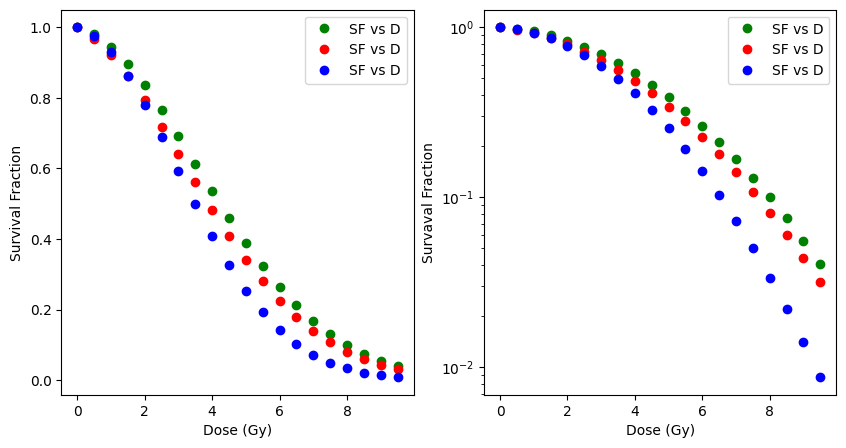

In [101]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,5)) #(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(lDose, lSF1,"go", label='SF vs D')
ax[0].plot(lDose, lSF2,"ro", label='SF vs D')
ax[0].plot(lDose, lSF3,"bo", label='SF vs D')
ax[0].set_xlabel('Dose (Gy)')
ax[0].set_ylabel('Survival Fraction')
#plt.yscale("log") #I think '.yscale' works on fig or plt, but on axes, it should be '.set_yscale' etc.
ax[0].legend()

ax[1].plot(lDose, lSF1,"go", label='SF vs D')
ax[1].plot(lDose, lSF2,"ro", label='SF vs D')
ax[1].plot(lDose, lSF3,"bo", label='SF vs D')
#ax[1].set_xlabel('Dose (Gy)')
#ax[1].set_ylabel('Survival Fraction')
#ax[1].set_yscale("log")
# Above three lines equivalent to the following line according to 
#.  #https://stackoverflow.com/questions/13399293/the-preferred-way-to-set-matplotlib-figure-axes-properties
ax[1].set(xlabel='Dose (Gy)', ylabel='Survaval Fraction', yscale='log') #alSo true for xlim, ylim etc.
ax[1].legend()
plt.show()

[GoTop](#GoTop) <a id='Pylab_What_Is_It_and_Should_I_Use_It'></a>
### Pylab: What Is It, and Should I Use It?
Ref: https://realpython.com/python-matplotlib-guide/#pylab-what-is-it-and-should-i-use-it

Let’s start with a bit of history: John D. Hunter, a neurobiologist, began developing matplotlib around 2003, originally inspired to emulate commands from Mathworks’ [MATLAB](https://realpython.com/matlab-vs-python/) software. John passed away tragically young at age 44, in 2012, and matplotlib is now a full-fledged community effort, developed and maintained by a host of others. (John gave a [talk](https://www.youtube.com/watch?v=e3lTby5RI54) about the evolution of matplotlib at the 2012 SciPy conference, which is worth a watch.)

One relevant feature of MATLAB is its global style. The Python concept of importing is not heavily used in MATLAB, and most of MATLAB’s [functions](https://www.mathworks.com/help/matlab/functionlist.html) are readily available to the user at the top level.

Knowing that matplotlib has its roots in MATLAB helps to explain why pylab exists. pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style. It exists only to bring a number of functions and classes from both NumPy and matplotlib into the [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces), making for an easy transition for former MATLAB users who were not used to needing import statements.

Ex-MATLAB converts (who are all fine people, I promise!) liked this functionality, because with from pylab import *, they could simply call plot() or array() directly, as they would in MATLAB.

[GoTop](#GoTop) <a id='The_Matplotlib_Object_Hierarchy'></a>
### The Matplotlib Object Hierarchy
Ref: https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy

One important big-picture matplotlib concept is its object hierarchy.

If you’ve worked through any introductory matplotlib tutorial, you’ve probably called something like `plt.plot([1, 2, 3])`. This one-liner hides the fact that a plot is really a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:

<img src="images/image4_matplotlib_object_hierarchy.png" width=400 height=400 />

Here’s an illustration of this hierarchy in action. Don’t worry if you’re not completely familiar with this notation, which we’ll cover later on:

In [79]:
fig, _ = plt.subplots()
type(fig)

matplotlib.figure.Figure

Above, we created two [variables](https://realpython.com/python-variables/) with `plt.subplots()`. The first is a top-level Figure object. The second is a “throwaway” variable that we don’t need just yet, denoted with an underscore. Using attribute notation, it is easy to traverse down the figure hierarchy and see the first tick of the y axis of the first Axes object:

In [80]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

In [81]:
#kp-cell
third_tick = fig.axes[0].yaxis.get_major_ticks()[2]
type(third_tick)

matplotlib.axis.YTick

In [82]:
#kp-cell
ticks = fig.axes[0].yaxis.get_major_ticks()
type(ticks)

list

In [84]:
len(ticks) #kp-cell

6

Above, fig (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.

Matplotlib presents this as a figure anatomy, rather than an explicit hierarchy:

<img src="images/image4_matplotlib_figure_anatomy.png" width=600 height=600 />

(In true matplotlib style, the figure above is created in the matplotlib docs [here](https://matplotlib.org/examples/showcase/anatomy.html).)

#### Actually, I copied the code that made figure_anatomy below

Ref: https://matplotlib.org/2.0.2/examples/showcase/anatomy.html

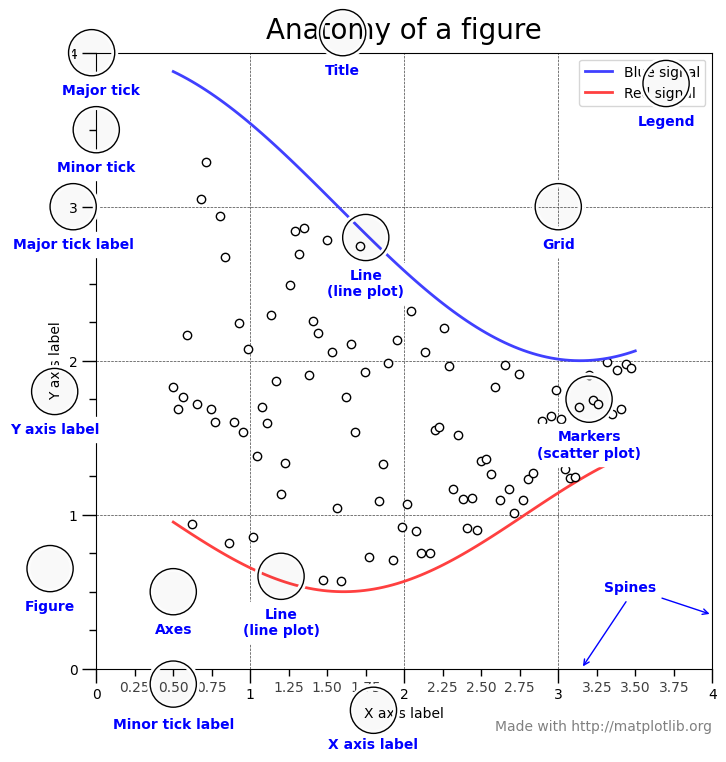

In [90]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

[GoTop](#GoTop) <a id='The_Figures_Behind_The_Scenes'></a>
### The “Figures” Behind The Scenes

Each time you call `plt.subplots()` or the less frequently used `plt.figure()` (which creates a Figure, with no Axes), you are creating a new Figure object that matplotlib sneakily keeps around in memory. Earlier, we alluded to the concept of a current Figure and current Axes. By default, these are the most recently created Figure and Axes, which we can show with the built-in function `id()` to display the address of the object in memory:

In [92]:
fig1, ax1 = plt.subplots()
print(id(fig1))

4765768400


In [93]:
id(plt.gcf())  # `fig1` is the current figure.

4765768400

In [96]:
fig2, ax2 = plt.subplots()
id(fig2) == id(plt.gcf())  # The current figure has changed to `fig2`.

True

(We could also use the built-in [is operator](https://realpython.com/python-is-identity-vs-equality/) here.)

After the above routine, the current figure is fig2, the most recently created figure. However, both figures are still hanging around in memory, each with a corresponding ID number (1-indexed, in MATLAB style):

In [97]:
plt.get_fignums()

[1, 2, 3, 4, 5]

A useful way to get all of the Figures themselves is with a mapping of `plt.figure()` to each of these integers:

In [98]:
def get_all_figures():
...    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

Be cognizant of this if running a script where you’re creating a group of figures. You’ll want to explicitly close each of them after use to avoid a MemoryError. By itself, `plt.close()` closes the current figure, `plt.close(num)` closes the figure number num, and `plt.close('all')` closes all the figure windows:

In [99]:
plt.close('all')
get_all_figures()

[]

[GoTop](#GoTop) <a id='Plot_Organization_in_matplotlib'></a>
### [Plot Organization in matplotlib — Your One-stop Guide](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801)
Matias Calderini Oct 27, 2019·9 min read

If you are reading this, it is probably because you agree with me that most matplotlib tutorials out there are missing a crucial aspect of plotting and data visualization.

While there might be thousands of tutorials on how to change line thickness or the size of your titles, they all seem to forget that organization of subplots plays a huge role in conveying the story your data is telling. Sometimes you might want to emphasize the importance of a plot by making it bigger, or complement a plot by adding another one as an inset on top of it.

To do those edits, I have seen (too) many people save individual plots done with Python and later re-arrange it all together on some other image editing software. Not only is this inefficient, it is not scalable to high volume plotting or to plots that you need to tweak and/or redo multiple times.

For all those friends and for all of you out there still struggling with such problems, here is your one-stop guide on how to organize your plots and subplots using only matplotlib on Python.

A picture is worth a thousand words, so for those that want a quick preview, those that are re-reading this, or those whith TLDR syndrome, here is a sample code for what we will accomplish in this tutorial:

Note: *(**TLDR ==Too long; didn't read (abbreviated TL;DR and tl;dr)** is a shorthand notation added by an editor indicating that a passage appears too long to invest the time to digest it.)*

<class 'module'>
<class 'type'>
<class 'module'>


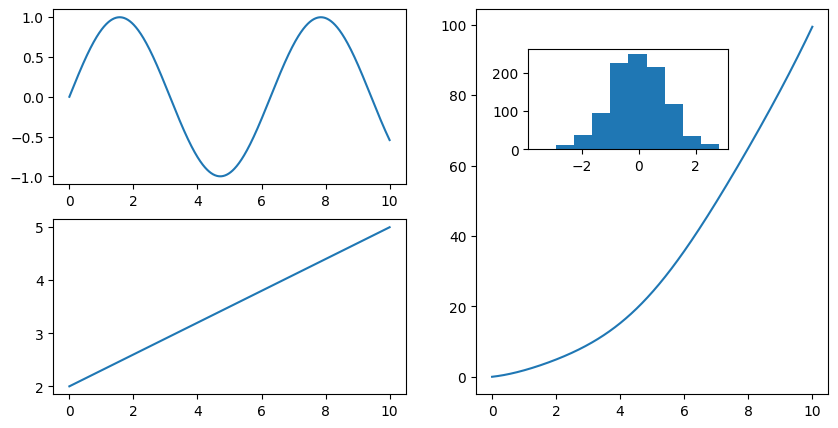

In [78]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

#kp: =====
print(type(plt))
print(type(GridSpec))
print(type(np))
#kp: =====

time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(time, score)

ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2])
ax3.hist(distribution)

plt.show()

And here is a schematic of how we will approach the issue of subplot organization:

<img src="images/image4_plotOrganizationExplantion.png" width=600 height=600 />
Fig. Schematic of subplot organization elements

If that piqued your interest or if you are back to review what you read before, welcome to the comprehensive beginner tutorial on organizing your plots in Python using matplotlib!

The way we will approach the issue of organization is by clarifying the distinction between figures, subplots and axes, and how we can optimize it with matplotlib’s gridSpec. Without further ado, let’s start with the first and most basic one.

### Figure — Your Frame

The most basic element of a matplotlib plot is the figure. The figure object should be considered as your frame. Imagine any visualization as a potential collage of graphs and the figure as the place where all those graphs are pasted and moved around.

Just like a picture frame though, the figure by itself is an empty structure waiting for content. This is the first element of our initial schematic:
<img src="images/image4_FigureOrFrameExplaining.png" width=600 height=600 />
Schematic — Figure

In *matplotlib*, we create the figure object when using the line *fig = plt.figure()*. We can also omit to put `fig `= . This is simply so we store the figure object in some variable in case we needed to use it later. For example, if you wanted to save the figure as an image with `fig.save()`. If you were to save the newly created figure, you’ll see your beautiful newly created blank image.

In [38]:
fig = plt.figure()
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [39]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

If all you wanted was to plot a single graph, then you wouldn’t need to think about axes or subplots. You could simply do it like this:

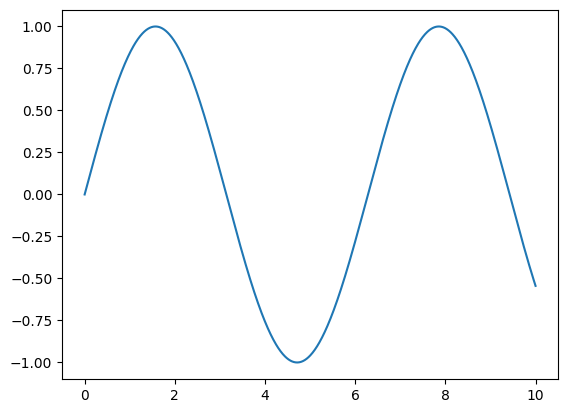

In [40]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)

# Plotting on a figure
fig = plt.figure()
plt.plot(time, height)
fig.savefig('images/junkMadeByCode.png')
plt.show()

We can deconstruct the previous block of code:
* `plt.figure()` creates a figure object
* `plt.plot(time, height)` will take the available space and draw the relationship between time (x-axis) and height (y-axis)
* `plt.show()` will simply render the plot. This is not necessary in notebooks, but it is good practice in case you are coding on a text editor or a less interactive editor than the one we use here.

If you had more data, you could add more lines to this simple plot. But what if we wanted to plot a second variable, on a different plot? That’s where the axes and subplots become useful.

### Axes — The plotting canvas

**While the figure object was your plotting frame, the canvas on which you will be drawing is the axes object. By themselves, axes are free-floating,** meaning that they can be put in any position on the figure. We can add them to our orignal schematic:

<img src="images/image4_axesExplaining.png" width=600 height=600 />
Schematic — Axes

In code, this is simply done like this:


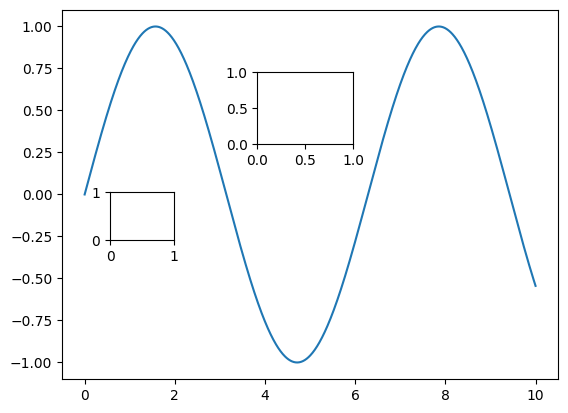

In [41]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# Adding new empty axes
fig.add_axes([0.43, 0.6, 0.15, 0.15])  #[lowerCorner_x, lowerCorner_y, width, height]
fig.add_axes([0.2, 0.4, 0.1, 0.1])     #[lowerCorner_x, lowerCorner_y, width, height]

fig.savefig('images/figureAxes')
plt.show()

Here we see that the `add_axes([left, bottom, width, height])` function added two new plotting areas onto the original plot. The specific position and size of the new axes are specified in the respective input arrays of the functions.

However, adding empty axes doesn’t serve much purpose, so let’s see how to use them to plot:

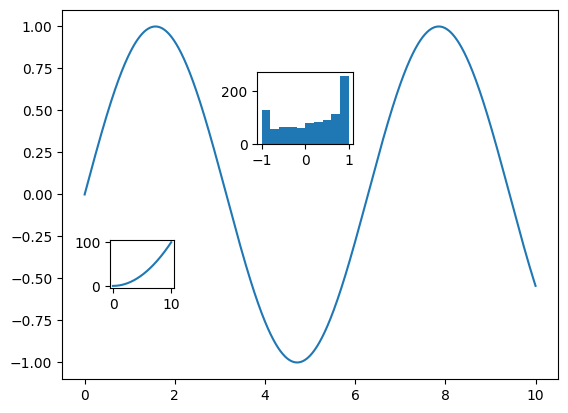

In [42]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# First new axes
ax1 = fig.add_axes([0.43, 0.6, 0.15, 0.15])
ax1.hist(height)

# Second new axes
ax2 = fig.add_axes([0.2, 0.3, 0.1, 0.1])
ax2.plot(time, time**2)

fig.savefig('images/figureAxes2.png')
plt.show()

In this example, we see that `add_axes()` actually gives or returns the actual axes object onto which we can plot, which we stored in the variables ax1 and ax2. We can then use these variables to plot different meaningful data that add value to our plot similarly to how we did it before.

In this case, we added a histogram of the height values and we plotted the square of time (which is not very meaningful information other than to show how to plot on axes).

### Subplots — Organize multiple axes

The distinction between subplots and axes is not particularly clear when one first learns to plot with matplotlib. That is because, normally, subplots are introduced before introducing axes. As you’ll see now, that tiny detail can change your whole perception of how one organizes their visualization.

In a nutshell, subplots are simply a way to organize your free floating axes into a rigid grid. You can imagine that subplots creates a table, and each individual cell of the table is a new axes for you to fill with data. Just like in this new take on the original schematic:

<img src="images/image4_subplotExplaining.png" width=600 height=600 />
Schematic — Subplots

This is how one can use subplots:

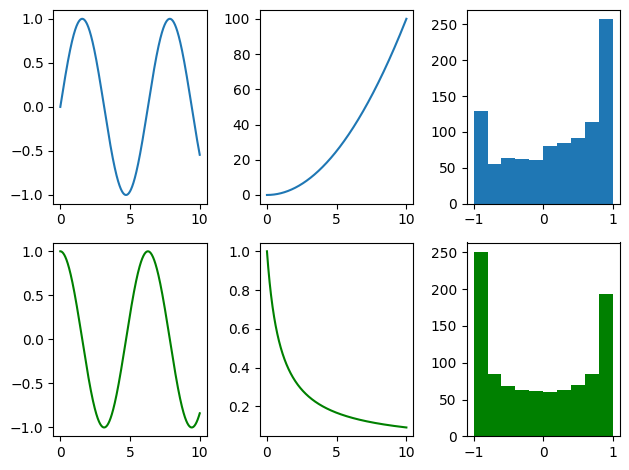

In [43]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = np.cos(time)

# Plotting all the subplots
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(time, height)
axes[0, 1].plot(time, time**2)
axes[0, 2].hist(height)
axes[1, 0].plot(time, weight, color='green')
axes[1, 1].plot(time, 1/(time+1), color='green')
axes[1, 2].hist(weight, color='green')
plt.tight_layout() #kp: With this, overlaying labels on adjacent subplots were avoided
fig.savefig('images/figureAxesSubplots.png')
plt.show()

Again, let’s take it one line at at time:
* `plt.subplots()`, created a grid (2 rows and 3 columns). The function returned the figure object (stored in fig) that will hold all the subplots, as well as all the individual axes (stored in axes).
* The axes are contained on a `2D numpy array (a matrix or table if you prefer)` and can be accessed individually by their position. For example, the top-left axes with `axes[0, 0]`. If we had tons of plots to make, here we could iterate through these positions to plot them individually.
* `plt.tight_layout()` is normally used when using `plt.subplots()` to make sure the axis ticks and labels don’t overlap across subplots. Feel free to remove it to see what this means.

I highly recommend looking at the official documentation for further customization of the subplot grid, such as spacing between rows/columns or whether axis are shared.

So we know how to plot multiple graphs either at specific, free floating locations and under a well structured grid. **What else is there to do in terms of organization then? Well, what if we wanted to put emphasis on one plot by making it twice as big as another one? What if we wanted to create some type of tiled gallery of plots? This is where GridSpec becomes useful.**
### GridSpec — A Flexible Organization

**The way GridSpec works is that, as with subplots, one defines a grid. However, instead of automatically associating an axes to each cell of the grid, one can select how many cells each individual plotting area will occupy.** So if we wanted a plot to occupy twice the area of another plot, we could associate it to twice the number of cells in the grid.

Let’s see this in code:

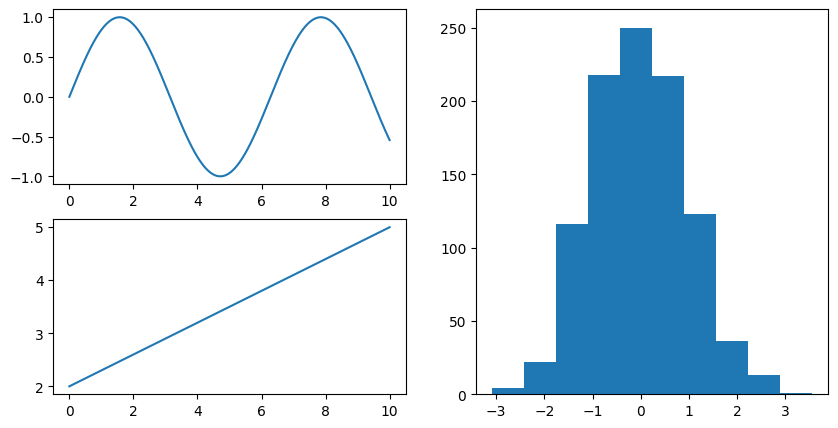

In [45]:
# A new set of data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
distribution = np.random.normal(0, 1, len(time))

# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)
#fig.savefig('images/gridspec.png')
plt.show()

* We first create the (2 by 2) grid with `gs = gridspec.GridSpec(nrows=2, ncols=2)`.
* `fig.add_subplot(gs[0, 0])` will take a subset of these cells by accessing them by index [0, 0] in this case.
* This subset can include multiple cells of our gridSpec grid, simply by accessing more than one cell as with `ax2 = fig.add_subplot(gs[:, 1])` which selects for all rows and the second column.

We can further customize our plots by setting each row or column’s size. Meaning that some rows could be narrower or wider than others. For example:

<Figure size 1000x500 with 0 Axes>

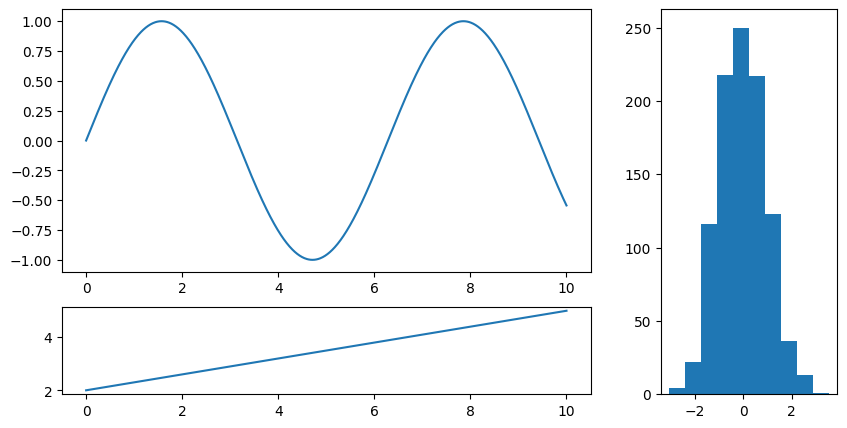

In [49]:
# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
#gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3, 1], height_ratios=[3, 1])
gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 1], height_ratios=[3, 1])


# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)
plt.show()

And with this, we can finally get to our original schematic:

<img src="images/image4_GridSpecExplaining.png" width=600 height=600 />
Schematic of subplot organization elements:

From all we learned up to here, we can fully deconstruct the schematic: what we see here is that we applied a gridspec on a grid that is (5, 5), but with some rows being smaller than others. Then we added on subplot covering the whole first row, a subplot covering about half the third row, two subplots for the last row and 1 subplot covering the last column and last three rows. On top of this last subplot, we added two free floating axes.

As before, I highly recommend looking at the [official documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html) for further gridSpec customization, such as spacing between rows/columns or how to create nested gridSpecs.

And with that, hopefully now you know how you can structure your plots using figures, axes, subplots and GridSpec. If you have any questions or comments, please leave a comment below.

[GoTop](#GoTop) <a id='Creating_custom_plotting_functions_with_matplotlib'></a>
### Creating custom plotting functions with matplotlib

Ref: https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1 A short tutorial to learn how to create modular functions that involve plotting with matplotlib    - Matias Calderini   Apr 27, 2020·11 min read

TLDR: Define your own functions that involve plotting onto a specific axes with the following syntax:

```py
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)
    
def multiple_custom_plots(x, y, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) #example plot1
    ax.scatter(x, y, **sct_kwargs) #example plot2
    return(ax)
```
You can find the original code repository at [this link](https://github.com/maticalderini/tutorial_matplotlibCustomPlots).
### Intro

In a [previous post](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801) (kp: see [above section](#Plot_Organization_in_matplotlib)), I showed you how to better organize your figures. We saw how you could neatly display your different plots using subplots, how to add free-floating axes and how to easily create a tiled organization of your axes with GridSpec.

Because the focus of that post was the general structure and presentation of the overall figure, the plots themselves were quite simple in that they were only using one pre-defined matplotlib function such as `.plot` or `.hist` with the default parameters. Often times though, within the nice tiled structure that you learned in the previous post, you will need to draw a specific plot of your own that combines information from different types of basic plotting functions along with calls to some other data-generating or data-processing function. For example, plotting the distribution of random samples with its corresponding theoretical density function on top.

Here, I will show you how to create your own custom plotting functions that can be easily used by calling them within your organized plots with something like the following:

```py
fig, axes = plt.subplots(number_of_subplots)
for ax in axes:
    my_custom_plotting_function(ax=ax, function_kwargs)
```

<img src="images/image4_CustomFuncExplaining.png" width=600 height=600 />

Together with a nice organization of the subplots, this will help you maximize your static plotting on matplotlib (foreshadowing a dynamics plots follow-up tutorial …. maybe…) and leverage information from different plots to share a comprehensive story of your data.

### Basic syntax
#### Passing the axes

The first step in being able to have a series of custom plots within your figure is being able to connect an individual custom plot to an individual axes. The first step then is to be able to pass the axes on which we want to plot to our custom function. This can be done simply like this:
```py
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)
```
So what did I do there? The first relevant part here is the argument ax. If you have used seaborn before, you might already know how to use this. Essentially, ax will be taking the axes object onto which you want to plot. This can be a subplot axes or a simple free floating inset axes. The idea is that the organization part of the plot would be dealt outside of this function, potentially by another function.

Why does ax default to None though? This is better answered by the lines:

if ax is None:
        ax = plt.gca()

we see that if no axes object was provided in ax, it defaults to None and triggers this if condition. In this case, since no axes was given, by default, the function would look for the last axes used in the current figure, or create one if there are none available, with the function .gca (which stands for get current axes) and use that as the axes on which to plot. At the end of the function, we also return this ax, in case we want to use it for other customizations (not needed but practical in some cases).

Let’s test this by first plotting without specifying the axes and then by providing a specific axes:

In [52]:
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

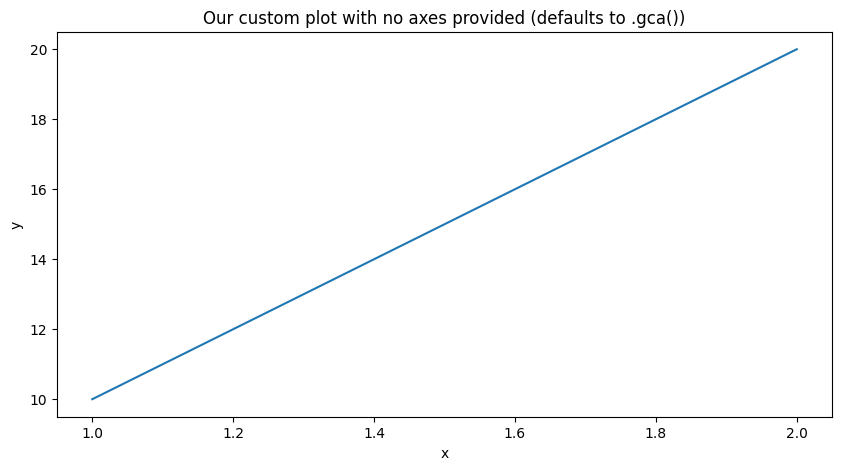

In [53]:
# Without providing axes (default to None -> gca())
plt.figure(figsize=(10, 5))
custom_plot([1, 2], [10, 20])
plt.title('Our custom plot with no axes provided (defaults to .gca())')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

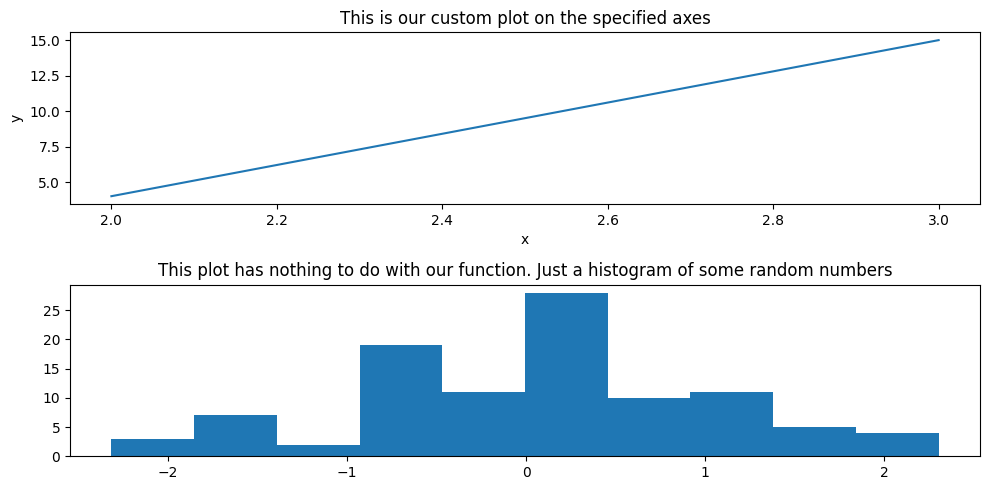

In [54]:
# Providing the axes
fig, axes = plt.subplots(2, figsize=(10, 5))

# Plotting with our function
custom_plot([2, 3], [4, 15], ax=axes[0])
axes[0].set(xlabel='x', ylabel='y', title='This is our custom plot on the specified axes')

# Example plot to fill the second subplot (nothing to do with our function)
axes[1].hist(np.random.normal(size=100))
axes[1].set_title('This plot has nothing to do with our function. Just a histogram of some random numbers')
plt.tight_layout() 

#This to avoid overlap of labels and titles across plots
plt.show()

### Passing the plot’s keyword arguments

So far so good; we can create a function to plot data and we can connect it to a specific axes of our plot (it even takes care of itself if no axes was provided). What about the `**plt_kwargs` though?

If you are not used to working with `**kwargs` (as in keyword arguments) in your functions (the actual name of the argument doesn't matter, you can name it `**kwargs, **plt_kwargs, **literally_anything_else` as long as you put the double asterisk "`**`") it will be easier to explain by first creating and using a new function that does not have `**kwargs` in it.

As an aside though, if you really haven’t seen this type of asterisk notation before, the use of single asterisks `*` and double asterisks `**` in python is quite useful in many situations, whether it is within or outside of functions, and definitely worth a google search (maybe even writing a blog post about it.... maybe...). Anyway, back to our example of `custom_plot` without `**kwargs`:

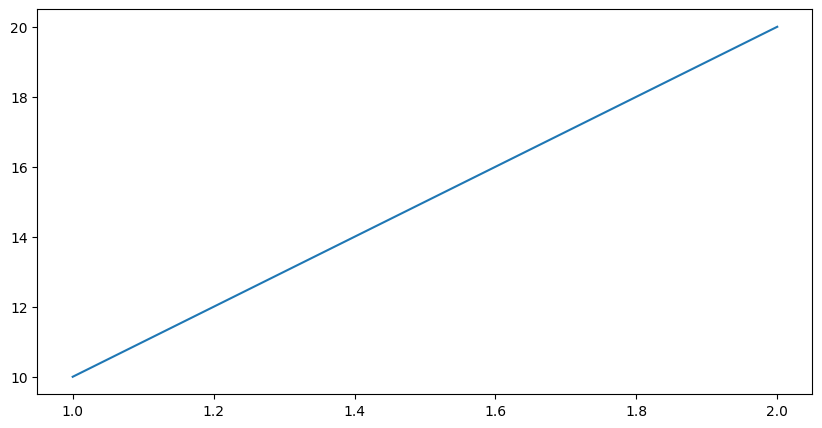

In [55]:
def no_kwargs_plot(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y) ## example plot here
    return(ax)

plt.figure(figsize=(10, 5))
no_kwargs_plot([1, 2], [10, 20])
plt.show()

No errors, no problems… However, what if you wanted to make the line thicker? Normally in `.plot()` we would simply set the argument linewidth to a thicker value. We could add linewidth to the list of inputs to `no_kwargs_plot` and then pass it to `.plot()` like this:

In [58]:
def no_kwargs_plot(x, y, ax=None, linewidth=1):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, linewidth) ## example plot here

That would take care of the problem. But what about all the other possible arguments into `.plot()`. Having to write them all in our function along with their default values would be really long and not very practical:

```py
def no_kwargs_plot(x, y, ax=None, linewidth=1, other=1,...):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, linewidth, other,....) ## example plot here
```
That’s where the use of `**` notation (`**kwargs`) becomes useful. When used on free key-value elements, such as orphan inputs in our function (those that are not associated with pre-defined arguments x, y and ax in our case) `**name` will pack all of this elements into a dictionary and store them in the variable **`name`**.

For example, if we were to use our plotting function as `custom_plot(x=xdata, y=ydata, ax=axes[0], linewidth=2, c='g')`, the resulting `plt_kwargs` dictionary would be `{'linewidth':2, 'c':'g'}`. If this is still not quite clear, look at the sample code below, the output (>>) and the schema underneath:

In [64]:
def print_kwargs_only(x, y, ax=None, **plt_kwargs):
    print(plt_kwargs) #to print the dictionary with all the orphan kwargs
    
print_kwargs_only(x=[1, 2], y=[10, 20], not_xyax=1,   
                  random_orphan_kwarg='so lonely', linewidth=2, c='g')
    
#>> {'not_xyax': 1, 'random_orphan_kwarg': 'so lonely', 'linewidth': 2, 'c': 'g'}

{'not_xyax': 1, 'random_orphan_kwarg': 'so lonely', 'linewidth': 2, 'c': 'g'}


In [65]:
#kp: My own test of the same function
print_kwargs_only(x=[2,5], y=[3,6], linewidth=3, kp='b',bp='a',cp='c')

{'linewidth': 3, 'kp': 'b', 'bp': 'a', 'cp': 'c'}


<img src="images/image4_kwargsExplaining.png" width=600 height=600 />

<img src="images/image4_kwargsExplaining2.png" width=600 height=600 />

So using `**` **solves the problem of taking all the possible plotting inputs into our function without needing to explicitly pre-define them and having them ready to use inside a dictionary**. How is this dictionary of supplementary keyword arguments used, though?

Previously, I mentioned that `**` behaved like a packing function when used on free elements. <font color="red">(kp: Notice the line `"**name will pack all of this elements into a dictionary and store them in the variable name."` above)</font> When you use `**` on a dictionary though (whether it was packed by `**` or not), `**` will actually do the opposite action it did before: it will unpack the dictionary into different free elements. In the `custom_function`, when we write `**plt_kwargs` inside `.plot()`, i.e. `ax.plot(x, y, **plt_kwargs)`, we are actually asking python to take the dictionary `plt_kwargs` and unpack all of its key-value pairs separately into the `.plot()` function as individual inputs.

<img src="images/image4_kwargsExplaining3.png" width=600 height=600 />

In that way, without knowing how many and which plot customizations will be used, we can pass them all to the part of our function that will be doing the plotting.

We can see this using again our original `custom_plot` function (you might notice that this time I used the axes returned by the function to show you how it can be used):

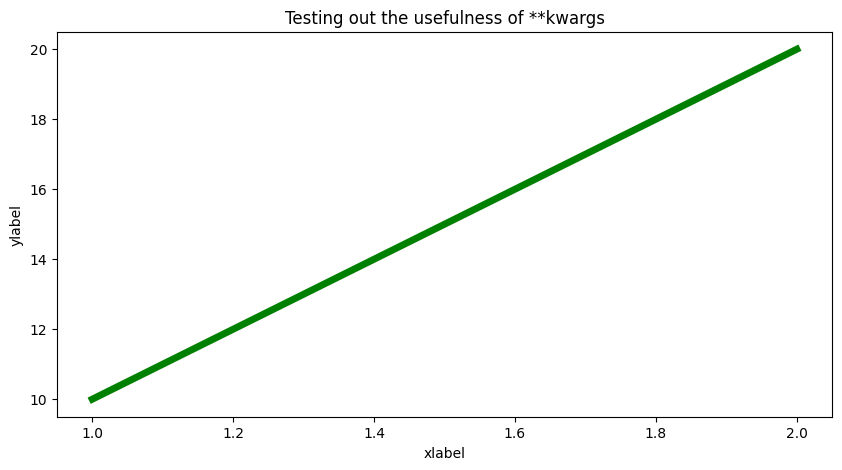

In [66]:
plt.figure(figsize=(10, 5))
out_ax = custom_plot([1, 2], [10, 20], linewidth=5, c='g')
out_ax.set(xlabel='xlabel', ylabel='ylabel', title='Testing out the usefulness of **kwargs')
plt.show()

### Extension to the basic syntax

That takes care of the basic syntax then. With that you should already be able to start producing some more interesting plots.

Before going ham though, <font color="red">(kp: From google: To go ham is to put in an extraordinary, even aggressive, amount of effort. If you went crazy eating ham, you'd be going ham on some ham. In this sense, ham may stand for hard as a motherf`****`r.)</font> we need to take care of one potential issue you might run into when using `**kwargs`. That is, what if you were doing multiple plots inside of the custom_plot function? for example, what if you were plotting two lines and one should be dashed, while the other one was just solid. How would `**kwargs` know which arguments go into which plot?

The answer is that “`**kwargs` the packing machine" wouldn't work any more and would need to be replaced, but "`**kwargs` the unpacking machine" would work perfectly fine. What do I mean by this? Let's define a new function called multiple_custom_plots to clarify it:

In [67]:
def multiple_custom_plots(x, y, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs)
    ax.scatter(x, y, **sct_kwargs)
    return(ax)

What is different here and how should we use it? First, look at the list of possible inputs. Now, instead of having `**kwargs`, we have two new arguments, one for each of our plots. Also, by default, these arguments are empty dictionaries.

If you followed my explanation before about `**kwargs` hopefully this is already quite clear for you. The idea is that since we cannot ask the function to automatically pack all the orphan inputs into one dictionary (we need two separate dictionaries now) we will instead have to provide each dictionary of plotting parameters ourselves, pre-packed.

Using them later with the double asterisk is no different than original custom_plot since using `**` on a dictionary still means that we want its values unpacked. We use empty dictionaries as default values because if you didn't provide a dictionary of customizations, we would run into problems when trying to unpack them (or the lack of them) with `**`. The empty dictionaries essentially are there to unpack nothing into the functions if nothing is provided.

Let’s see how we would use this:

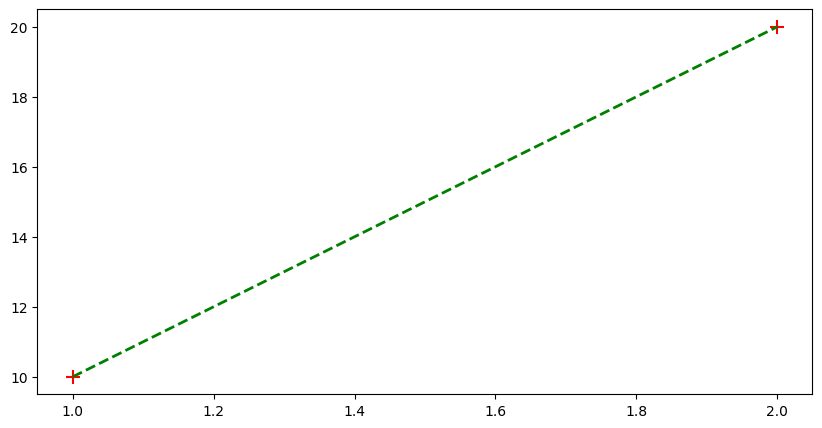

In [69]:
plot_params = {'linewidth': 2, 'c': 'g', 'linestyle':'--'}
scatter_params = {'c':'red', 'marker':'+', 's':100}
xdata = [1, 2]
ydata = [10, 20]
plt.figure(figsize=(10, 5))
multiple_custom_plots(xdata, ydata, plt_kwargs=plot_params, sct_kwargs=scatter_params)
plt.show()

### Quick application

So, when it comes to creating custom functions from which you can plot, the previous section should be enough for you to have quite a bit of fun for a while with static plots. In this next section, I will simply give you an example of a plot using a custom function hopefully to inspire you to go do some plots of your own.
### Sample size of random samples and Kernel Density Estimation

Imagine you wanted to see how the size of a sample from a given random variable affects the estimation of its underlying probability distribution.

Let’s assume we have a continuous random variable X that is normally distributed with a mean μ (mu) and a standard deviation σ (sigma) (i.e. X∼N(μ,σ²)). We would like to know how scipy’s **kernel density estimator (kde)** is affected by the size of our random sample (how many times we sample randomly from our normal distribution) by comparing it to the estimate of the underlying true **probability density distribution (pdf)**.

We will do this by plotting the samples themselves, their kde and their underlying pdf for different values of N.

In [75]:
from scipy import stats

def sample_plot(mu=0, sigma=1, N=100, sct_kwargs={}, pdf_kwargs={}, kde_kwargs={}, ax=None):
    # generate sample
    sample = np.random.normal(loc=mu, scale=sigma, size=N)
    
    # generate pdf
    xrange = mu + 5*sigma*np.linspace(-1, 1, 100)
    pdf = stats.norm.pdf(xrange, loc=mu, scale=sigma)
    
    # generate kde
    estimation = stats.gaussian_kde(sample)
    kde = estimation(xrange)
    
    #Plotting
    if ax is None:
        ax = plt.gca()   
    ax.scatter(sample, np.zeros_like(sample), **sct_kwargs)
    ax.plot(xrange, pdf, **pdf_kwargs)
    ax.plot(xrange, kde, **kde_kwargs)
    return(xrange)

Let’s deconstruct the function one step at a time:

First, the inputs. Here, instead of asking for arrays of data, we will be creating our own data from a Gaussian random number generator. So we need to ask for the relevant statistical parameters μ and σ (the mean and standard deviation respectively for Gaussian distributions). We also need to ask the number of samples N to be taken. We will actually be iterating over different values of N later to see the effect of the sample size on the estimation. The idea is to plot the samples as scatter points, and the pdf and kde as regular line plots. So we will provide as inputs a dictionary for their respective plotting parameters (linewidth, marker size, etc.). Finally, we will ask the axes of the figure on which we want to plot all three things.

The first section of the function will simply generate a random Gaussian sample of size N from the statistical parameters provided.

The second part of the code will create the x-y pairs of the line plot corresponding to the pdf of the normal distribution given by μ and σ. We limit the range of the pdf to ±5 standard deviations since anything further on either side is going to be quite small anyway.

The third part of the code is first calculating the kde of our sample and then applying it to the same range of values on the x-axis as our pdf.

Finally, in the fourth part of the code, we simply plot as a scatter plot all the sampled values on the x-axis (at a height of 0), and the pdf and kde as line plots. All three, with their respective plotting keyword arguments.

First, the inputs. Here, instead of asking for arrays of data, we will be creating our own data from a Gaussian random number generator. So we need to ask for the relevant statistical parameters μ and σ (the mean and standard deviation respectively for Gaussian distributions). We also need to ask the number of samples N to be taken. We will actually be iterating over different values of N later to see the effect of the sample size on the estimation. The idea is to plot the samples as scatter points, and the pdf and kde as regular line plots. So we will provide as inputs a dictionary for their respective plotting parameters (linewidth, marker size, etc.). Finally, we will ask the axes of the figure on which we want to plot all three things.

The first section of the function will simply generate a random Gaussian sample of size N from the statistical parameters provided.

The second part of the code will create the x-y pairs of the line plot corresponding to the pdf of the normal distribution given by μ and σ. We limit the range of the pdf to ±5 standard deviations since anything further on either side is going to be quite small anyway.

The third part of the code is first calculating the kde of our sample and then applying it to the same range of values on the x-axis as our pdf.

Finally, in the fourth part of the code, we simply plot as a scatter plot all the sampled values on the x-axis (at a height of 0), and the pdf and kde as line plots. All three, with their respective plotting keyword arguments.

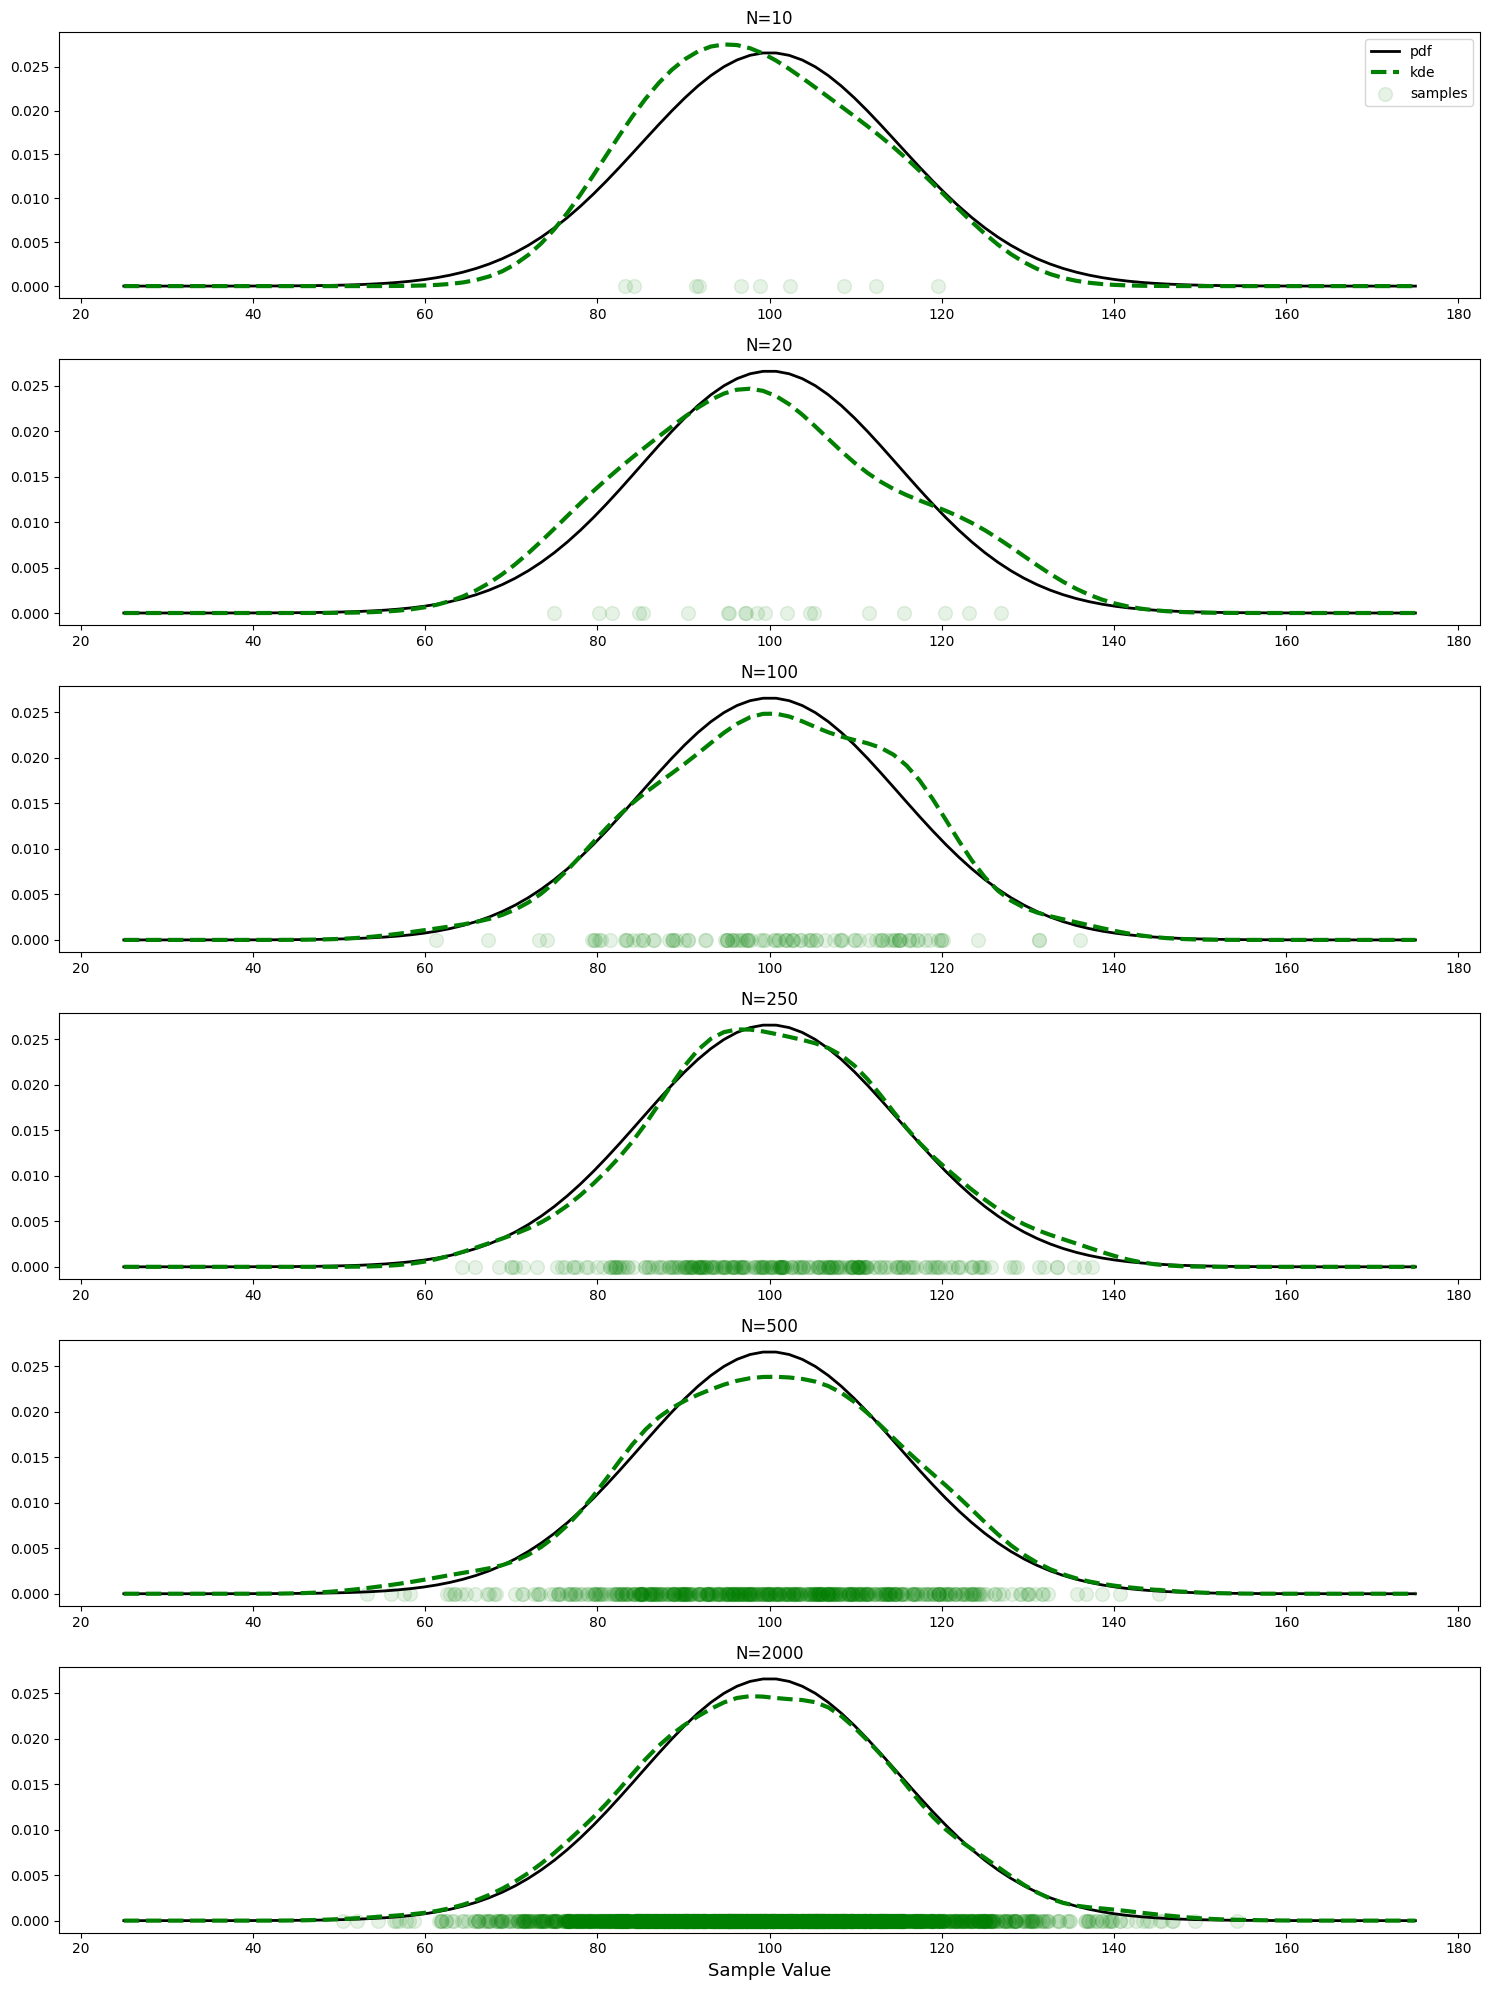

In [76]:
from scipy import stats

# Sample parameters
sample_sizes = (10, 20, 100, 250, 500, 2_000)
mean = 100
std = 15

# Plotting parameters
scatter_params = {'alpha':0.1, 'c':'g', 's':100, 'label':'samples'}
pdf_params = {"linewidth":2, 'c':'k', 'label':'pdf'}
kde_params = {"linewidth":3, 'ls':'--', 'c':'g', 'label':'kde'}

# Plotting
fig, axes = plt.subplots(6, figsize=(15, 20))
for ax, n in zip(axes, sample_sizes):
    sample_plot(mu=mean, sigma=std, N=n, ax=ax,
                sct_kwargs=scatter_params, pdf_kwargs=pdf_params, kde_kwargs=kde_params)
    ax.set_title(f'N={n}')
    
axes[0].legend()
axes[-1].set_xlabel('Sample Value', fontsize=13)
plt.tight_layout()
plt.savefig('finalplot')
plt.show()

And that’s it! Hopefully you learned how to add plotting abilities to your functions by properly passing the corresponding axes and keyword arguments. This should help you have increasingly modular code to quickly explore and visualize your data.

Originally published at https://maticalderini.github.io on April 28, 2020.

[GoTop](#GoTop) <a id='ClearingConfusion_twinx_twiny_etc'></a>
### Clearing the confusion on fig, ax = plt.subplots() and twinx, twiny, etc
Ref: https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca

When you begin your journey into Data Science, you are introduced to Matplotlib as your first library for Data Visualization. Most tutorials for beginners play a cruel trick on students by introducing them first to the ‘beginner-friendly’ `pyplot > plt` interface. As these poor students venture into the real world, they will find out the dudes on [StackOverflow](https://stackoverflow.com/) and most other people use a more flexible object-oriented way. They will get confused and most probably move on to Seaborn and Plotly. Or even worse, to the no-code interface of [Tableau](https://www.tableau.com/), like I almost did. (Because of this confusion, I specifically remember myself going through Quora and StackOverflow threads wondering if people were using Tableau over Matplotlib)

This article will introduce you to figure and axes objects in Matplotlib and their advantages over other methods.
#### Overview
* I. Introduction  
* II. Setup 
* III. plt.subplots(), preliminary understanding  
* IV. Axes methods vs. pyplot, understanding further   
* V. plt.subplots() grid system  
* VI. Doubling axis 
* VII. Sharing a commong axis between subplots
* VIII. Working with figure object  
* IX. Conclusion

#### II. Setup

In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'  
# No need to include %matplotlib inline magic command. These things come built-in now.

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

[GoTop](#GoTop) <a id='About_matplotlib_inline'></a>
## About '%matplotlib inline' and other matplotlib backends.
When I wasn't including the `%matplotlib inline` in any of the top cells in this notebook (http://localhost:8888/notebooks/KpInstalls/Geant4/ExamplesBld/HadronTherapyKp2n/DataAnalysis_RBE_LET_Fits_HadrontherapyKp2n_V6.ipynb#Fig1FromPaganetti2014paper) at /Users/kpadhikari/KpInstalls/Geant4/ExamplesBld/HadronTherapyKp2n, I saw strange/unexpected behoviour of plotting. When I was making subplots in the cells below and came back up to execute an upper cell that had a single plot (no supblot), the upper one also showed multiple plots like a subplot figure and so on, indicating that the plotting from the cell underneath (lower cell) was sitting in memory and was messing up the later plotting from an upper cell.

So, I googled again about the inlining and came to https://docs.wradlib.org/en/stable/notebooks/python/mplintro.html

```py
# This magic just sets up matplotlib's interactive mode
%matplotlib
# So you have to explicitely import the module into the namespace
import matplotlib.pyplot as pl
```
If you want to enable inline plotting

(mandatory if you use the Virtual Machine for Cross-Platform Weather Radar Science)
```py
# This magic just sets up matplotlib's interactive mode
%matplotlib inline
# So you have to explicitely import the module into the namespace
import matplotlib.pyplot as pl
```
`%matplotlib inline` turns on “inline plotting”, where plot graphics will appear in your notebook. This has important implications for interactivity: for inline plotting, commands in cells below the cell that outputs a plot will not affect the plot. For example, changing the color map is not possible from cells below the cell that creates a plot. However, for other backends, such as qt4, that open a separate window, cells below those that create the plot will change the plot - it is a live object in memory. If you are not using matplotlib in interactive mode at all, figures will only appear if you invoke `plt.show()`.

If you do not want to use inline plotting, just use `%matplotlib` instead of `%matplotlib inline`. The Kernel has to be restarted for this change to become effective.

If you want to magically import numpy and matplotlib
```py
%pylab
# or
%pylab inline
```
In the following, we use a sightly different syntax for `matplotlib inline`. This is because the notebook needs to be convertable to a Python script where IPython magic does not work. Please don’t let this confuse you…
```py
# Instead of matplotlib inline
import matplotlib.pyplot as pl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
```

#### From another website/forum:
ref: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

**Question:** Could someone explain to me what exactly is the use of %matplotlib inline? 
* Answer1: It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object). A simple Matplotlib tutorial is found here data-blogger.com/2017/11/15/…. – www.data-blogger.com
* A2: You can check the available backends (like inline) by entering: %matplotlib --list. – Luis Jan 11 '19 at 16:22

**Answer3:**

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:

    With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code. It may be worth also reading How to make IPython notebook matplotlib plot inline for reference on how to use it in your code.

If you want interactivity as well, you can use the [nbagg backend](http://matplotlib.org/users/whats_new.html#the-nbagg-backend) with `%matplotlib notebook` (in IPython 3.x), as described [here](https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline).

* A4: ok, but what is the alternative: how can I see the plots if there is no such magic activated? – JaakL Oct 22 '17 at 7:23


##### Answer 5:
To explain it clear:

If you don't like it like this:

<img src="images/image4_matplotlib_inline_explaining1.png" width=600 height=600 />

add `%matplotlib inline`

<img src="images/image4_matplotlib_inline_explaining2.png" width=600 height=600 />

and there you have it in your jupyter notebook.

* Your second code misses the whole point of using %matplotlib inline. The whole point is that now you don't need to use plt.show() which you are still using in the second code. One more interesting fact, in your second code, the figure will still appear in the jupyter notebook even if you don't use % matplotlib inline and just use plt.show(). Read my following question here which is even today unanswered. – Sheldore Jul 17 '20 at 9:26
* Yeah, there are certain bugs in the software we use. I usually like to write the clear commands. This means plt.show() should exist. The magic of %matplotlib inline should also be there even though it may be set somewhere by default. – prosti Jul 17 '20 at 10:11

##### Answer 6:

If you want to add plots to your Jupyter notebook, then `%matplotlib inline` is a standard solution. And there are other magic commands will use matplotlib interactively within Jupyter.

`%matplotlib`: any plt plot command will now cause a figure window to open, and further commands can be run to update the plot. Some changes will not draw automatically, to force an update, use `plt.draw()`

`%matplotlib notebook`: will lead to interactive plots embedded within the notebook, you can zoom and resize the figure

`%matplotlib inline`: only draw static images in the notebook
* A7:  Starting with IPython 5.0 and matplotlib 2.0 you can avoid the use of IPython’s specific magic and use matplotlib.pyplot.ion()/matplotlib.pyplot.ioff() which have the advantages of working outside of IPython as well. [ipython docs](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)

##### Answer 8:
If you don't know what backend is , you can read this: https://matplotlib.org/tutorials/introductory/usage.html#backends

    Some people use matplotlib interactively from the python shell and have plotting windows pop up when 
    they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. 
    Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich 
    applications. Some people use matplotlib in batch scripts to generate postscript images from 
    numerical simulations, and still others run web application servers to dynamically serve up graphs. 
    To support all of these use cases, matplotlib can target different outputs, and each of these 
    capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, 
    whereas the "backend" does all the hard work behind-the-scenes to make the figure.

So when you type `%matplotlib inline` , it activates the inline backend. As discussed in the previous posts :

    With this backend, the output of plotting commands is displayed inline within frontends like the 
    Jupyter notebook, directly below the code cell that produced it. The resulting plots will then 
    also be stored in the notebook document.

#### Answer 9:

**TL;DR**  (kp: Too long - didn't read)
##### %matplotlib inline - Displays output inline

IPython kernel has the ability to display plots by executing code. The IPython kernel is designed to work seamlessly with the matplotlib plotting library to provide this functionality.

    %matplotlib is a magic command which performs the necessary behind-the-scenes setup for IPython to 
    work correctly hand-in-hand with matplotlib; it does not execute any Python import commands, that 
    is, no names are added to the namespace.

##### Display output in separate window

     %matplotlib

##### Display output inline

(available only for the Jupyter Notebook and the Jupyter QtConsole)

     %matplotlib inline

#####  Display with interactive backends

(valid values `'GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template'`)

    %matplotlib gtk

Example - GTK3Agg - An Agg rendering to a GTK 3.x canvas (requires PyGObject and pycairo or cairocffi).

More details about matplotlib interactive backends: [here](https://matplotlib.org/2.1.2/Matplotlib.pdf)

    Starting with IPython 5.0 and matplotlib 2.0 you can avoid the use of IPython’s specific magic and use matplotlib.pyplot.ion()/matplotlib.pyplot.ioff() which have the advantages of working outside of IPython as well.

Refer: [IPython Rich Output - Interactive Plotting](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)
